In [6]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT
# June 2024

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Analyzing the ensemble error rate

In [19]:
from math import comb

def ensemble_error(n_classifiers, base_error):
    init_k = int(np.ceil(n_classifiers / 2))
    probs = [comb(n_classifiers, k) * base_error ** k * (1 - base_error) ** (n_classifiers - k)
             for k in range(init_k, n_classifiers + 1)]
    return sum(probs)

In [20]:
ensemble_error(25, 0.2)

0.0003690480345558283

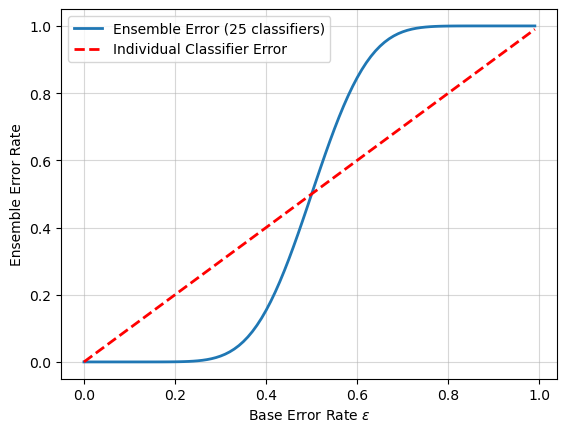

In [27]:
# Generate error rates for plotting
error_range = np.arange(0.0, 1.0, 0.01)
errors = [ensemble_error(25, error) for error in error_range]

plt.plot(error_range, errors, label='Ensemble Error (25 classifiers)', lw=2)
plt.plot(error_range, error_range, label='Individual Classifier Error', c='r', ls='--', lw=2)
plt.xlabel('Base Error Rate $\epsilon$')
plt.ylabel('Ensemble Error Rate')
plt.legend()
plt.grid(alpha=0.5)

plt.savefig('figures/ensemble_error_rate.pdf')

Combining multiple linear classifiers

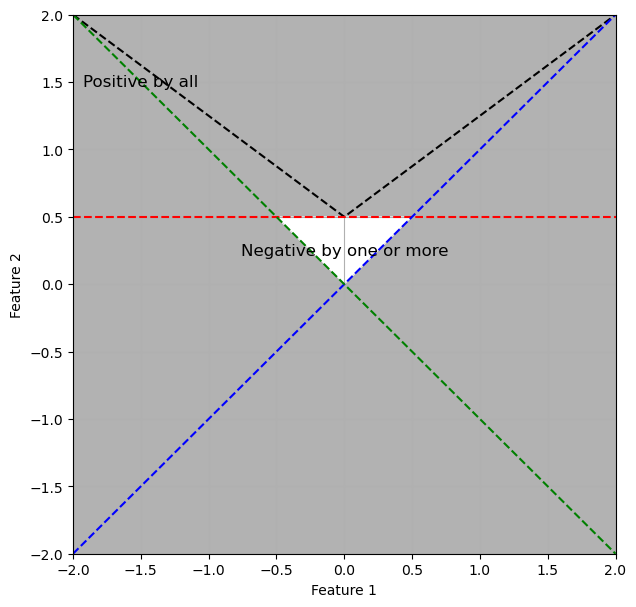

In [32]:
# Define the grid of points
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Define the classifiers
# Classifier 1: y > x
# Classifier 2: y > -x
# Classifier 3: y < 0.5
Z1 = Y > X
Z2 = Y > -X
Z3 = Y < 0.5

# Ensemble rule: Positive if all three classifiers agree on positive
Z = Z1 & Z2 & Z3

# Plotting
plt.figure(figsize=(7, 7))
plt.contourf(X, Y, Z, levels=[-1, 0, 1], alpha=0.6, colors=['#808080', '#FFFFFF'])
plt.plot([-2, 0, 2, -2], [2, 0.5, 2, 2], 'k--')  # Lines representing individual classifier boundaries

# Annotations to show the decision of each classifier
plt.text(-1.5, 1.5, 'Positive by all', fontsize=12, va='center', ha='center')
plt.text(0, 0.25, 'Negative by one or more', fontsize=12, va='center', ha='center')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0.5, color='red', linestyle='--')
plt.axline((0, 0), slope=1, color='blue', linestyle='--')
plt.axline((0, 0), slope=-1, color='green', linestyle='--')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()